https://www.renarepenning.com/weplaynoladata/

## Rena Repenning and Eddy Salazer

**CURRENT VERSION: UPDATED AS Of night 11/16**

# Project Plan

### Data 
1. We Play Data [<sup>1</sup>](#fn1)
    Provided by Christine Neely

### Explanation
We are inspired by The We Play center's mission: "to offer a safe place to play while engaging in activities that promote brain development." 
Melanie Richardson expressed a need for statistical evidence of We Play's importance.

### Methodology
First, we manually removed empty columns and rows from the five excel files.
Then, we broke apart sheets to make data frames adressing a single concern.
Using these dataframes we began crafted questions to answer with available data. In December we plan to meet with Melanie to get feedback on our efforts.

### Collaboration Plan
Rena and Eddy will utilize this repository to simultaneously edit the project. 
We plan on connecting over Zoom as needed and keeping constant communication over instant message. Also, we are both able to meet after class on Thursdays.
When convinient, we will export notebooks to Google Colabs to support simultaneous editing. 
(This is easily done using a Colabs Chrome extension).

### Footnotes
<span id="fn1"> 1. WePLAY data was last downloaded on October 25th, 2021. We could not use a live link because of spaces in filenames.</span>

# Exploring WePLAY Survey Results

Provided by Christine Neely from WePlay by Training Grounds nola. Data last accessed on October 25th.

##### Imports as needed

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip3 install openpyxl # package to open xlsx files

In [154]:
renapath = "../notebooks/_data/WePlayData/CleanedWPC"
edpath = "./_data/WePlayData/CleanedWPC"
# PATH -- set path variable 
path = renapath  # path to manually cleaned excels

# ETL

## Family Survey Data

##### Responses about the adults
> Adults means over 19
> Children means under 18

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


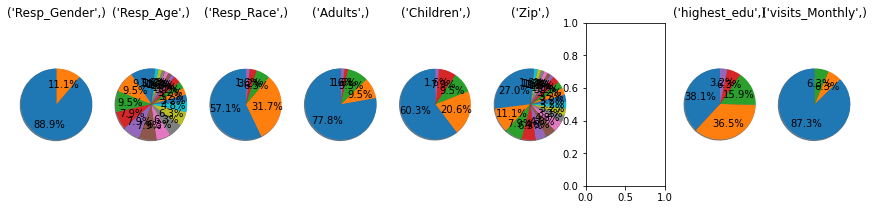

In [97]:
familySurveyDf = pd.read_excel(path + "FamilySurvey" + ".xlsx")
# "Resp" = Respondant
adult_FD = familySurveyDf.iloc[1:, :10]
adult_FD.columns = [["Resp_Gender", "Resp_Age", "Resp_Race", "Adults", "Children", "Zip", "OMIT", "Avg_Income", "highest_edu", "visits_Monthly"]]
adult_FD.drop(columns=["OMIT"], inplace=True)

fig1, ax1 = plt.subplots(nrows=1,ncols=9,figsize=(15,3))
for i, c in enumerate(adult_FD.columns):
    if i != 6:
        ax1[i].pie(adult_FD[c].value_counts(), autopct='%1.1f%%', #labels=["Yes", "No"],
                shadow=True, startangle=90)
        ax1[i].set_title(adult_FD.columns[i])
        #ax1[i].set_xlabel('hi', fontsize = 20, color = 'red')
        ax1[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Info about how parents found the we play center

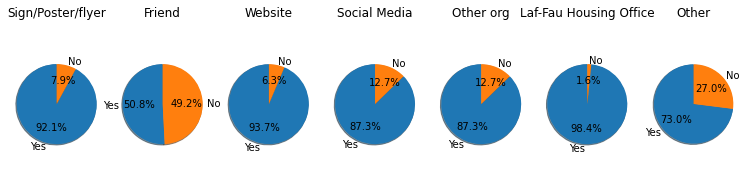

In [140]:
## DF with info on how they found WPC
cols = ["Sign/Poster/flyer", "Friend", "Website", "Social Media", "Other org", "Laf-Fau Housing Office", "Other"]

how_found_WPC = familySurveyDf.iloc[1:, 10:17]
how_found_WPC.columns = [cols]

fig1, ax1 = plt.subplots(nrows=1,ncols=7,figsize=(13,3))
for i, c in enumerate(cols):
    ax1[i].pie(how_found_WPC[c].isna().value_counts(), autopct='%1.1f%%', labels=["Yes", "No"],
            shadow=True, startangle=90)
    ax1[i].set_title(cols[i])
    #ax1[i].set_xlabel(cols[i], fontsize = 12, color = 'black')
    ax1[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# cite: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

##### Misc info about children that are brought to the weplay center

0
1
2


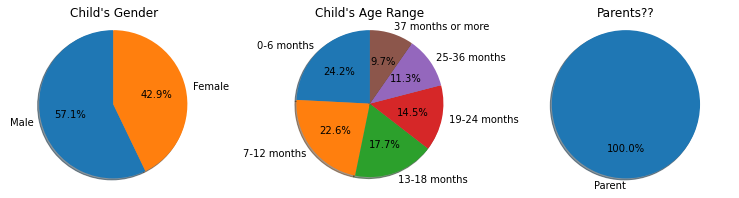

count               62
unique               6
top       25-36 months
freq                15
Name: Age, dtype: object

In [187]:
child_FD = familySurveyDf.iloc[1:, 17:24] # combined 18/19 into 17 manually
child_FD.columns = ["Gender", "Age", "age2", "age3", "parent", "age4", "misc"]
child_FD.drop(columns=["age2", "age3", "age4", "misc"], inplace=True)
labels = [ ["Male", "Female"], 
          ["0-6 months", "7-12 months", "13-18 months", "19-24 months", "25-36 months", "37 months or more"], 
          ["Parent"] ]
child_FD["Gender"][~(child_FD.Gender == 'Male' ) & ~(child_FD.Gender == 'Female')] = np.nan
child_FD["parent"][~(child_FD.parent == 'Parent')] = np.nan

titles = ["Child's Gender", "Child's Age Range", "Parents??"]
fig1, ax1 = plt.subplots(nrows=1,ncols=3,figsize=(13,3))
for i, c in enumerate(child_FD.columns):
    print(i)
    ax1[i].pie(child_FD[c].value_counts(), autopct='%1.1f%%',
            shadow=True, startangle=90, labels=labels[i])
    ax1[i].set_title(titles[i])
    ax1[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

child_FD["Age"].describe()
## note: what is the parent column

##
## HOW TO GET THE LABELS FOR AGE TO BE RIGHT
##


##### "Please share the number of days in a typical week that you engage in the following activities"

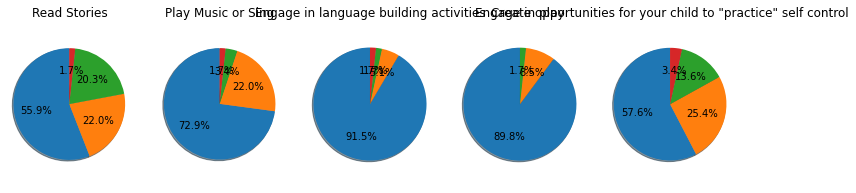

In [191]:
daysActivitys_FD = familySurveyDf.iloc[1:, 24:29]
daysActivitys_FD.columns = ["Read Stories", "Play Music or Sing", 
                     "Engage in language building activities",
                    'Engage in play', 'Create opportunities for your child to "practice" self control']

fig1, ax1 = plt.subplots(nrows=1,ncols=5,figsize=(13,3))
for i, c in enumerate(daysActivitys_FD.columns):
    ax = ax1[i].pie(daysActivitys_FD[c].value_counts(), autopct='%1.1f%%',
            shadow=True, startangle=90)#, labels=C)
    ax1[i].set_title(c)
    ax1[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### Please state how strongly you agree with the following statements

array([<AxesSubplot:ylabel="I respond quickly to my child's cries">],
      dtype=object)

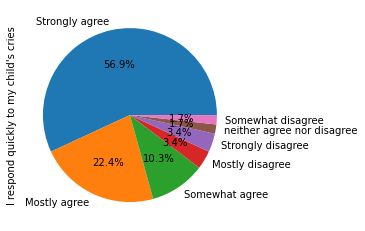

In [207]:
parenting_FD = familySurveyDf.iloc[1:, 29:34]
parenting_FD.columns = ['I respond quickly to my child\'s cries', 'I am able to comfort my child when he/she is upset',
 'I know the meaning of my child\'s signals (cry, turning away, rubbing eyes)',
 'I step back and encourage my child to work through problems',
 'I am able to follow my child\'s lead during playtime']
cols = parenting_FD.columns

parenting_FD[cols[0]].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')


array([<AxesSubplot:ylabel='I am able to comfort my child when he/she is upset'>],
      dtype=object)

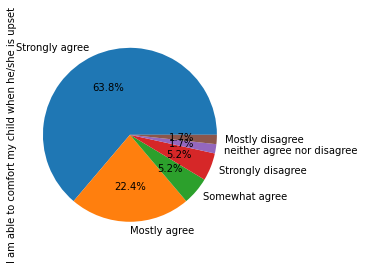

In [208]:
 parenting_FD[cols[1]].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')

array([<AxesSubplot:ylabel="I know the meaning of my child's signals (cry, turning away, rubbing eyes)">],
      dtype=object)

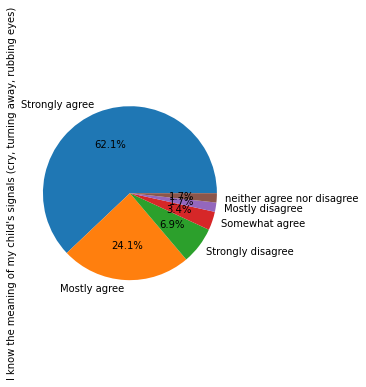

In [204]:
 parenting_FD[cols[2]].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')

array([<AxesSubplot:ylabel='I step back and encourage my child to work through problems'>],
      dtype=object)

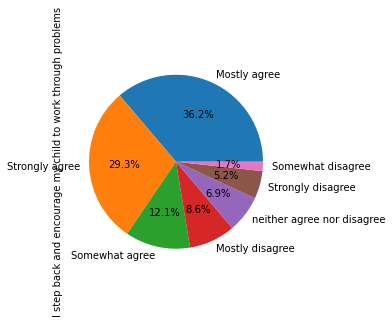

In [205]:
 parenting_FD[cols[3]].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')

array([<AxesSubplot:ylabel="I am able to follow my child's lead during playtime">],
      dtype=object)

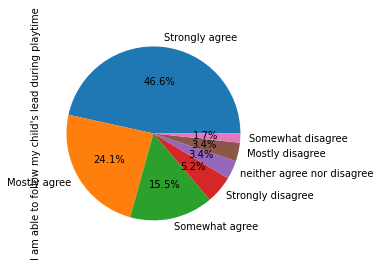

In [206]:
 parenting_FD[cols[4]].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')

#### Parents vary in how they discipline. Below are some strategies parents use to discipline their children. When engaging with your child during the last 7 days, which strategies have you used:

array([<AxesSubplot:ylabel='used strategy x'>], dtype=object)

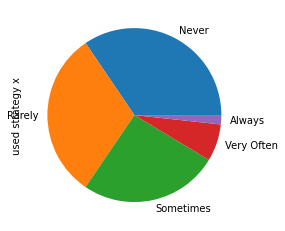

In [102]:
discipline_FD = familySurveyDf.iloc[1:, 34]#:42]

discipline_FD.value_counts().plot.pie(subplots=True, ylabel="used strategy x")

#will do later

#### The We PLAY Center strives to create a welcoming environment. Please indicate whether you agree or disagree with the following statements about the We PLAY Center:

In [55]:
environmentstatements_FD = familySurveyDf.iloc[1:, 42:48]
environmentstatements_FD

,The We PLAY Center strives to create a welcoming environment. Please indicate whether you agree or disagree with the following statements about the We PLAY Center:,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
2,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
4,NaN,NaN,NaN,NaN,NaN,NaN
5,Strongly disagree,Mostly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
...,...,...,...,...,...,...
59,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
60,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
61,NaN,NaN,NaN,NaN,NaN,NaN
62,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree


##### Answer if you have attended the We PLAY Center more than 2 times. As a result of attending the We PLAY Center select the response that best describes how you feel.

In [56]:
x = familySurveyDf.iloc[1:, 48:53]
x

,Answer if you have attended the We PLAY Center more than 2 times. As a result of attending the We PLAY Center select the response that best describes how you feel.,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
1,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Mostly agree,Mostly agree
2,NaN,NaN,NaN,NaN,NaN
3,Strongly agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN


##### Play/center + name

In [57]:
y = familySurveyDf.iloc[1:, 53:]
y

,"In a typical week, about how much time does your child engage in active indoor play?","In a typical week, about how much time does your child engage in quiet indoor play?","In a typical week, about how much time does your child engage in outdoor play?",What will keep you coming back to the We PLAY Center?,What aspect of the We PLAY Center do you find most helpful?,Would you recommend a family or friend to the We PLAY Center?,First Name,Last Name,Date
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,5,7,The positive staff and positive environment.,NaN,Yes,Xontownekiah,Ellison,08/13/2019
3,12,12,3,My kids love it there an I enjoy playing with ...,Different stuff,Yes,Megan,Nelson,08/12/2019
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30,15,20,"Friendly staff, fun space",Interactive space outside the house that is st...,Yes,Noah,Cohen,07/31/2019
...,...,...,...,...,...,...,...,...,...
59,40,10,5,"Location, staff, other children",Ease of access,Yes,Megan,Walker,01/31/2019
60,20,10,3,We plan to attend regularly so our baby can so...,"It's open more than one day, so that's easier ...",Yes,Yve,Labbe,01/31/2019
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,10,10,10,Tye environment is warm and welcoming! Melanie...,All of it!,Yes,Jade,George,01/31/2019


## Incoming Parent Reflections

### DF with incoming parent survey data for July 2019

In [209]:
#read in data for incoming parent relfections from july 2019
incomingjuly2019 = pd.read_excel(path + "IncomingParentReflection-July2019" + ".xlsx")
#display all columns
pd.set_option('display.max_columns',None)
#delete row full of test reponses
incomingjuly2019.drop([1], axis=0, inplace = True)

incomingjuly2019#.head(3)

,Email Address,What is your gender?,How old are you?,Which of the following race/ethnicity categories best describes you?,Unnamed: 4,How many adults (people 19 years or older including yourself) live in your household?,How many children (18 or younger) live in your household?,What is your zip code?,Unnamed: 8,"Please select the range that describes your household's average annual income (including wages, child support, government benefits/financial assistance)",What is the highest level of education you have completed?,How many children do you currently bring to the We PLAY Center?,How old is the child?,What is the child's gender?,What is your relationship to the child?,How old is the 1st child?,What is the 1st child's gender?,What is your relationship to the 1st child?,How old is the 2nd child?,What is the 2nd child's gender?,What is your relationship to the 2nd child?,How old is the 1st child?.1,What is the 1st child's gender?.1,What is your relationship to the 1st child?.1,How old is the 2nd child?.1,What is the 2nd child's gender?.1,What is your relationship to the 2nd child?.1,How old is the 3rd child?,What is the 3rd child's gender?,What is your relationship to the 3rd child?,Have you applied to a childcare program?,Which of the following are reasons that you have not applied for childcare? Please select all that apply.,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,What type of childcare program is it?,Are you currently on a waitlist for the childcare program you applied to?,How many times do you attend the We PLAY center in a typical month?,"""Overall...""",Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Please think about each statement and how you currently feel,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Think about each statement and how you currently feel .,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Do you have any comments about your first experience at the We PLAY Center?,Unnamed: 65,"Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.",Unnamed: 67,Unnamed: 68,Unnamed: 69,"After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.",Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,"""The We PLAY Center...""",Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,"""The We PLAY Center has...""",Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,"""Since coming to We PLAY Center…""",Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,"""Since coming to the We PLAY Center I…""",Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,"""Since coming to We PLAY Center I…""",Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Please share any techniques or strategies you have learned from attending the We PLAY Center that you find most helpful as a parent (please provide a concrete example).,Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,What will keep you coming back to the We PLAY Center?,How did you find out about the We PLAY Center?,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Would you recommend the We PLAY Center to a family or friend?,Do you have any feedback on how the We PLAY Center can improve this Parent Reflection Form? Your feedback will used to modify this form and guide the development of future forms.,Are there any additional comments you would like to share with the We PLAY Center?,First Name,Last Name
0,NaN,Response,Response,Response,Other (please spec

**Data about the child's parent or guardian.**

In [211]:
#create df with information about adult bringing child in
adult_july2019 = incomingjuly2019[["What is your gender?","How old are you?","Which of the following race/ethnicity categories best describes you?","What is the highest level of education you have completed?","What is your relationship to the child?","How many times do you attend the We PLAY center in a typical month?"]]
#Rename columns 
adult_july2019.columns = [["Resp_Gender", "Resp_Age", "Resp_Race","highest_edu","Resp_relationship_to_child","visits_Monthly"]]
#drop unnessecary column with few data points
adult_july2019.drop([0], axis=0, inplace = True)
adult_july2019

,Resp_Gender,Resp_Age,Resp_Race,highest_edu,Resp_relationship_to_child,visits_Monthly
2,Female,35-44,Black or African American,Completed graduate or professional school,Mother,More than 5 times
3,Female,35-44,White or Caucasian,Completed graduate or professional school,Mother,4-5 times
4,Male,25-34,White or Caucasian,High school graduate/ GED,NaN,1 time (this is my first time)
5,Male,65+,Black or African American,Some college,Grandfather,More than 5 times
6,Female,35-44,Black or African American,Completed graduate or professional school,NaN,4-5 times
...,...,...,...,...,...,...
60,Female,35-44,White or Caucasian,Completed graduate or professional school,Mother,2-3 times
61,Female,35-44,White or Caucasian,Completed graduate or professional school,Mother,2-3 times
62,Female,35-44,White or Caucasian,Completed graduate or professional school,NaN,More than 5 times
63,Male,25-34,White or Caucasian,College graduate,Father,4-5 times


**Data about the child's household.**

In [60]:
#create df with info relating to child's household
householdinfo_july2019 = incomingjuly2019.iloc[0:, 5:10]
#Rename columns
householdinfo_july2019.columns = [["Adults", "Children", "Zip", "OMIT", "Avg_Income"]]
#Drop unessecary column with few data points
householdinfo_july2019.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
householdinfo_july2019.drop([0], axis=0, inplace = True)
#householdinfo_july2019

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**Data about how parents found WPC.**

In [61]:
## DF with info on how they found WPC
how_found_WPC_july2019 = incomingjuly2019.iloc[1:, 120:127]
how_found_WPC_july2019.columns = [["Sign/Poster/flyer", "Friend", "Website", "Social Media", "Other org", "Lafitte Fauborg Housing Office", "Other"]]

#~how_found_WPC_july2019.isna()  # Gives table of methods people used to find WPC

**Data about the childrens age and gender.**

In [62]:
child_July2019 = incomingjuly2019.iloc[1:, 12:21]

child_July2019.columns = [["1st child age","1st child's gender","resp relationship to 1st child","2nd child age"," 2nd child's gender","resp relationship to 2nd child","3rd child age"," 3rd child's gender","resp relationship to 3rd child"]]                   

#child_July2019
## this just tells gender and age of children + age of child 2, age child three
# then relationship , relationship 2, other

**Data about why parents have not applied for childcare.**

In [63]:
#create df with info about why parents have not applied for childcare
nochildcare_july2019 = incomingjuly2019.iloc[0:, 31:39]
#Rename columns
nochildcare_july2019.columns = [["It is too expensive", "I feel my child is not old enough", "There is a lack of quality childhood care and education","I use a nanny to care for my child", "I use a family member to care for my child","Other  (please specify)","Type of Program Applied for","Are you currently on a waiting list for a program?"]]
#Drop unessecary column with few data points
#householdinfo_july2019.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
nochildcare_july2019.drop([0], axis=0, inplace = True)
#nochildcare_july2019

**Data about parents interact with their children before and after WP.**

In [104]:
#create df with directly comparable info about how parents interact with their children before and after WePlay
parent_child_behaviors_july2019 = incomingjuly2019[["Please think about each statement and how you currently feel","Unnamed: 52","Unnamed: 53","Unnamed: 54","Unnamed: 55","Unnamed: 56",'"Since coming to the We PLAY Center I…"',"Unnamed: 96","Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100"]]
#Rename columns
parent_child_behaviors_july2019.columns = [["Read to my child (Before WP)","Play with my child (Before WP)","Talk to my child (Before WP)", "Listen to my child (Before WP)","Set limits with my child (Before WP)","Yell at my child (Before WP)","Read to my child (Since WP)","Play with my child (Since WP)","Talk to my child (Since WP)","Listen to my child (Since WP)","Set limits with my child (Since WP)","Yell at my child (Since WP)"]]
#drop unnesscary row with response parameters
parent_child_behaviors_july2019.drop([0], axis=0, inplace = True)
#parent_child_behaviors_july2019

**Data about how parents feel they've grown since WP.**

In [65]:
#create df with info about how parents feel they've grown since We Play

since_WP_Parents_july2019 = incomingjuly2019[["After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.","Unnamed: 71","Unnamed: 72","Unnamed: 73","Unnamed: 74","Unnamed: 75","Unnamed: 76",'"Since coming to We PLAY Center…"',"Unnamed: 90","Unnamed: 91","Unnamed: 92","Unnamed: 93","Unnamed: 94"]]
#Rename columns
since_WP_Parents_july2019.columns = [["My stress level as a parent...","My knowledge about parenting support and resources in the community...","My knowledge about my child’s development...","My knowledge about how to foster my child’s development...","My knowledge about nurturing and responsive parenting strategies...","My knowledge about nutrition and breastfeeding...","My confidence in my role as a parent...","I engage with my child by repeating his/her words or sounds...","I engage with my child in pretend play...","I stand back and let my child work through problems...","I engage in bonding activities with my child...","I am better able to help my child uses age appropriate social skills...","I am better able to support my child as he/she learns new skills..."]]
#drop unnesscary row with response parameters
since_WP_Parents_july2019.drop([0], axis=0, inplace = True)
since_WP_Parents_july2019

,My stress level as a parent...,My knowledge about parenting support and resources in the community...,My knowledge about my child’s development...,My knowledge about how to foster my child’s development...,My knowledge about nurturing and responsive parenting strategies...,My knowledge about nutrition and breastfeeding...,My confidence in my role as a parent...,I engage with my child by repeating his/her words or sounds...,I engage with my child in pretend play...,I stand back and let my child work through problems...,I engage in bonding activities with my child...,I am better able to help my child uses age appropriate social skills...,I am better able to support my child as he/she learns new skills...
2,Somewhat decreased,Increased significantly,Somewhat increased,Increased significantly,Increased significantly,Stayed the same,Somewhat increased,The Same,More often,More often,More often,The Same,More often
3,Decreased significantly,Increased significantly,Increased significantly,Increased significantly,Increased significantly,Somewhat increased,Increased significantly,More often,More often,More often,More often,More often,More often
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Stayed the same,Increased significantly,Increased significantly,Increased significantly,Increased significantly,Somewhat increased,Increased significantly,More often,The Same,More often,More often,More often,More often
6,Decreased significantly,Increased significantly,Somewhat increased,Increased significantly,Increased significantly,Increased significantly,Increased significantly,More often,More often,More often,More often,More often,More often
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Somewhat decreased,Somewhat increased,Somewhat increased,Somewhat increased,Somewhat increased,Somewhat increased,Somewhat increased,The Same,The Same,The Same,More often,More often,More often
61,Stayed the same,Increased significantly,Somewhat increased,Increased significantly,Increased significantly,Increased significantly,Somewhat increased,The Same,The Same,More often,The Same,More often,The Same
62,Stayed the same,Stayed the same,Stayed the same,Stayed the same,Stayed the same,Stayed the same,Stayed the same,The Same,The Same,The Same,The Same,The Same,The Same
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data about how parents feel their children have grown since WP.**

In [66]:
#create df with info about how parents feel their children have grown since We Play
since_WP_child_july2019 = incomingjuly2019[["Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.","Unnamed: 58","Unnamed: 59","Unnamed: 60"]]
#Rename columns
since_WP_child_july2019.columns = [["My child's early learning and cognitive skills...","My child's early language abilities...","My child's early social emotional skills...", "My child's school readiness..."]]
#drop unnesscary row with response parameters
since_WP_child_july2019.drop([0], axis=0, inplace = True)
#since_WP_child_july2019

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Data about the parent's misc opinions on WP.**

In [67]:
#create df with parent's other opinions on WePlay
other_WP_opinions_july2019 = incomingjuly2019[['"The We PLAY Center..."',"Unnamed: 79","Unnamed: 80","Unnamed: 81","Unnamed: 82",'"The We PLAY Center has..."',"Unnamed: 84","Unnamed: 85","Unnamed: 86","Unnamed: 87","Unnamed: 88"]]
#Rename columns
other_WP_opinions_july2019.columns = [["Provides an enriched learning environment, provides educational toys","Offers an adequate number of toys","Creates a positive welcoming friendly atmosphere", "Staff is knowledgeable and answer questions willingly","Staff is patient and empathetic","Been helpful to my family","Given me more confidence as a parent","Helped me to become a better parent","Provided me with positive parenting strategies","Supported me in my role as a parent/caregiver","Created a support system with other members of the We PLAY Center"]]
#drop unnesscary row with response parameters
other_WP_opinions_july2019.drop([0], axis=0, inplace = True)
other_WP_opinions_july2019

,"Provides an enriched learning environment, provides educational toys",Offers an adequate number of toys,Creates a positive welcoming friendly atmosphere,Staff is knowledgeable and answer questions willingly,Staff is patient and empathetic,Been helpful to my family,Given me more confidence as a parent,Helped me to become a better parent,Provided me with positive parenting strategies,Supported me in my role as a parent/caregiver,Created a support system with other members of the We PLAY Center
2,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Agree,Agree
3,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
6,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
...,...,...,...,...,...,...,...,...,...,...,...
60,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Strongly Agree
61,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree
62,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,No Opinion,No Opinion,Agree,Strongly Agree,Strongly Agree
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data about what kind of information parents want more of from WP.**

In [68]:
#create df with survey info about what kind of info parents want more of
desired_info_july2019 = incomingjuly2019[["Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.","Unnamed: 109","Unnamed: 110","Unnamed: 111","Unnamed: 112","Unnamed: 113","Unnamed: 114","Unnamed: 115","Unnamed: 116","Unnamed: 117"]]
#Rename columns
desired_info_july2019.columns = [["Stress Relief","Information about community resources","Information about how to foster my child’s development", "Information about nurturing and responsive parenting strategies","Information about mouthing (biting, putting objects in their mouth)","Information about conflict resolution","Information about sharing","Information about nursing/ feeding","Information about temper tantrums","Information about sleeping"]]
#drop unnesscary row with response parameters
#desired_info_july2019.drop([0], axis=0, inplace = True)
desired_info_july2019
#~desired_info_july2019.isna()

,Stress Relief,Information about community resources,Information about how to foster my child’s development,Information about nurturing and responsive parenting strategies,"Information about mouthing (biting, putting objects in their mouth)",Information about conflict resolution,Information about sharing,Information about nursing/ feeding,Information about temper tantrums,Information about sleeping
0,Stress relief,Information about community resources,Information about how to foster my child’s dev...,Information about nurturing and responsive par...,"Information about mouthing (biting, putting ob...",Information about conflict resolution,Information about sharing,Information about nursing/ feeding,Information about temper tantrums,Information about sleeping
2,Stress relief,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information about temper tantrums,NaN
3,Stress relief,Information about community resources,NaN,NaN,"Information about mouthing (biting, putting ob...",NaN,NaN,NaN,Information about temper tantrums,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information about temper tantrums,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information about temper tantrums,Information about sleeping
61,Stress relief,NaN,NaN,NaN,"Information about mouthing (biting, putting ob...",Information about conflict resolution,NaN,NaN,Information about temper tantrums,Information about sleeping
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Open response, what will keep people coming back to WP.**

In [69]:
#create df with open response detailing what parents say will keep them coming back
keep_coming_back_july2019 = incomingjuly2019[["What will keep you coming back to the We PLAY Center?"]]
#drop unnesscary row with response parameters
#keep_coming_back_july2019.drop([0], axis=0, inplace = True)
#keep_coming_back_july2019

### DF with incoming parent survey data from Nov 2019

In [70]:
#read in data for incoming parent relfections from july 2019
incomingnov2019 = pd.read_excel(path + "IncomingParentReflection-November2019" + ".xlsx")
#display all columns
pd.set_option('display.max_columns',None)
#delete row full of test reponses
incomingnov2019.drop([0], axis=0, inplace = True)

incomingnov2019.head(3)

,Email Address,What is your gender?,How old are you?,Which of the following race/ethnicity categories best describes you?,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,How many adults (people 19 years or older including yourself) live in your household?,How many children (18 or younger) live in your household?,What is your zip code?,Unnamed: 13,"Please select the range that describes your household's average annual income (including wages, child support, government benefits/financial assistance)",What is the highest level of education you have completed?,How many children do you currently bring to the We PLAY Center?,How old is the child?,What is the child's gender?,What is your relationship to the child?,Unnamed: 20,How old is the 1st child?,What is the 1st child's gender?,What is your relationship to the 1st child?,Unnamed: 24,How old is the 2nd child?,What is the 2nd child's gender?,What is your relationship to the 2nd child?,How old is the 1st child?.1,What is the 1st child's gender?.1,What is your relationship to the 1st child?.1,How old is the 2nd child?.1,What is the 2nd child's gender?.1,What is your relationship to the 2nd child?.1,How old is the 3rd child?,What is the 3rd child's gender?,What is your relationship to the 3rd child?,Have you applied to a childcare program?,Which of the following are reasons that you have not applied for childcare? Please select all that apply.,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,What type of childcare program is it?,Are you currently on a waitlist for the childcare program you applied to?,How many times do you attend the We PLAY center in a typical month?,"""Overall...""",Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Please think about each statement and how you currently feel,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Think about each statement and how you currently feel .,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Do you have any comments about your first experience at the We PLAY Center?,Unnamed: 72,"Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.",Unnamed: 74,Unnamed: 75,Unnamed: 76,"After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.",Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,"""The We PLAY Center...""",Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,"""The We PLAY Center has...""",Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,"""Since coming to We PLAY Center…""",Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,"""Since coming to the We PLAY Center I…""",Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,"""Since coming to We PLAY Center I…""",Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Please share any techniques or strategies you have learned from attending the We PLAY Center that you find most helpful as a parent (please provide a concrete example).,Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,What will keep you coming back to the We PLAY Center?,How did you find out about the We PLAY Center?,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Would you recommend the We PLAY Center to a family or friend?,Do you have any feedback on how the We PLAY Center can improve this Parent Reflection Form? Your feedback will used to modify this form and guide the development of future forms.,Are there any additional comments you would

**Data about the child's parent or guardian.**

In [71]:
#create df with information about adult bringing child in
adult_nov2019 = incomingnov2019[["What is your gender?","How old are you?","Which of the following race/ethnicity categories best describes you?","What is the highest level of education you have completed?","What is your relationship to the child?","How many times do you attend the We PLAY center in a typical month?"]]
#Rename columns 
adult_nov2019.columns = [["Resp_Gender", "Resp_Age", "Resp_Race","highest_edu","Resp_relationship_to_child","visits_Monthly"]]
#adult_nov2019

**Data about the child's household.**

In [72]:
#create df with info relating to child's household
householdinfo_nov2019 = incomingnov2019.iloc[0:, 10:15]
#Rename columns
householdinfo_nov2019.columns = [["Adults", "Children", "Zip", "OMIT", "Avg_Income"]]
#Drop unessecary column with few data points
householdinfo_nov2019.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
#householdinfo_nov2019.drop([0], axis=0, inplace = True)
#householdinfo_nov2019

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**Data about how parents found WPC.**

In [73]:
## DF with info on how they found WPC
how_found_WPC_nov2019 = incomingnov2019.iloc[1:, 127:136]
how_found_WPC_nov2019.columns = [["Sign/Poster/flyer", "Friend","Family", "Website", "Social Media", "Other org", "Lafitte Fauborg Housing Office", "We PLAY Center Staff","Other"]]

#~how_found_WPC_nov2019.isna()  # Gives table of methods people used to find WPC

**Data about the childrens age and gender.**

In [74]:
child_nov2019 = incomingnov2019.iloc[1:, 17:33]
child_nov2019.drop(["Unnamed: 20","How old is the 1st child?.1","What is the 1st child's gender?","What is your relationship to the 1st child?","Unnamed: 24","How old is the 1st child?","What is the 1st child's gender?","What is your relationship to the 1st child?.1"], axis=1, inplace = True)
child_nov2019.columns = [["1st child age","1st child's gender","1st resp relationship to child","2nd child age"," 2nd child's gender","resp relationship to 2nd child","3rd child age"," 3rd child's gender","resp relationship to 3rd child"]]                   
#child_nov2019

## this just tells gender and age of children + age of child 2, age child three
# then relationship , relationship 2, other

**Data about why parents have not applied for childcare.**

In [75]:
#create df with info about why parents have not applied for childcare
nochildcare_nov2019 = incomingnov2019.iloc[0:, 34:42]
#Rename columns
nochildcare_nov2019.columns = [["It is too expensive", "I feel my child is not old enough", "There is a lack of quality childhood care and education","I use a nanny to care for my child", "I use a family member to care for my child","Other  (please specify)","Type of Program Applied for","Are you currently on a waiting list for a program?"]]

#nochildcare_nov2019

**Data about parents interact with their children before and after WP.**

In [76]:
#create df with directly comparable info about how parents interact with their children before and after WePlay
parent_child_behaviors_nov2019 = incomingnov2019[["Please think about each statement and how you currently feel","Unnamed: 59","Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63",'"Since coming to the We PLAY Center I…"',"Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100","Unnamed: 101"]]
#Rename columns
parent_child_behaviors_nov2019.columns = [["Read to my child (Before WP)","Play with my child (Before WP)","Talk to my child (Before WP)", "Listen to my child (Before WP)","Set limits with my child (Before WP)","Yell at my child (Before WP)","Read to my child (Since WP)","Play with my child (Since WP)","Talk to my child (Since WP)","Listen to my child (Since WP)","Set limits with my child (Since WP)","Yell at my child (Since WP)"]]

parent_child_behaviors_nov2019

,Read to my child (Before WP),Play with my child (Before WP),Talk to my child (Before WP),Listen to my child (Before WP),Set limits with my child (Before WP),Yell at my child (Before WP),Read to my child (Since WP),Play with my child (Since WP),Talk to my child (Since WP),Listen to my child (Since WP),Set limits with my child (Since WP),Yell at my child (Since WP)
1,NaN,NaN,NaN,NaN,NaN,NaN,Does not apply,More often,More often,More often,More often,More often
2,NaN,NaN,NaN,NaN,NaN,NaN,The Same,More often,More often,More often,More often,More often
3,NaN,NaN,NaN,NaN,NaN,NaN,The Same,More often,More often,The Same,The Same,The Same
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,The Same,The Same,The Same,The Same,The Same,The Same
7,Sometimes,Often,Often,Often,Often,Rarely,NaN,NaN,NaN,NaN,NaN,NaN
8,Often,Often,Often,Often,Sometimes,Rarely,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,The Same,More often,The Same,The Same,The Same,The Same


**Data about how parents feel they've grown since WP.**

In [77]:
#create df with info about how parents feel they've grown since We Play
since_WP_Parents_nov2019 = incomingnov2019[["After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.","Unnamed: 78","Unnamed: 79","Unnamed: 80","Unnamed: 81","Unnamed: 82","Unnamed: 83",'"Since coming to We PLAY Center…"',"Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100","Unnamed: 101"]]
#Rename columns
since_WP_Parents_nov2019.columns = [["My stress level as a parent...","My knowledge about parenting support and resources in the community...","My knowledge about my child’s development...","My knowledge about how to foster my child’s development...","My knowledge about nurturing and responsive parenting strategies...","My knowledge about nutrition and breastfeeding...","My confidence in my role as a parent...","I engage with my child by repeating his/her words or sounds...","I engage with my child in pretend play...","I stand back and let my child work through problems...","I engage in bonding activities with my child...","I am better able to help my child uses age appropriate social skills...","I am better able to support my child as he/she learns new skills..."]]

since_WP_Parents_nov2019

,My stress level as a parent...,My knowledge about parenting support and resources in the community...,My knowledge about my child’s development...,My knowledge about how to foster my child’s development...,My knowledge about nurturing and responsive parenting strategies...,My knowledge about nutrition and breastfeeding...,My confidence in my role as a parent...,I engage with my child by repeating his/her words or sounds...,I engage with my child in pretend play...,I stand back and let my child work through problems...,I engage in bonding activities with my child...,I am better able to help my child uses age appropriate social skills...,I am better able to support my child as he/she learns new skills...
1,Increased significantly,Increased significantly,Increased significantly,Increased significantly,Increased significantly,Somewhat increased,Increased significantly,More often,More often,More often,More often,More often,More often
2,Somewhat decreased,Increased significantly,Somewhat increased,Increased significantly,Increased significantly,Does not apply,Increased significantly,More often,More often,More often,More often,More often,More often
3,Somewhat decreased,Increased significantly,Increased significantly,Somewhat increased,Somewhat increased,Increased significantly,Somewhat increased,More often,More often,More often,The Same,The Same,The Same
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Somewhat decreased,Somewhat increased,Somewhat increased,Somewhat increased,Somewhat increased,Somewhat increased,Somewhat increased,The Same,The Same,The Same,The Same,The Same,The Same
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Stayed the same,Somewhat increased,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,More often,More often,The Same,The Same,The Same,The Same


**Data about how parents feel their children have grown since WP.**

In [78]:
#create df with info about how parents feel their children have grown since We Play
since_WP_child_nov2019 = incomingnov2019[["Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.","Unnamed: 74","Unnamed: 75","Unnamed: 76"]]
#Rename columns
since_WP_child_nov2019.columns = [["My child's early learning and cognitive skills...","My child's early language abilities...","My child's early social emotional skills...", "My child's school readiness..."]]
#drop unnesscary row with response parameters
#since_WP_child_nov2019.drop([0], axis=0, inplace = True)
#since_WP_child_nov2019

**Data about the parent's misc opinions on WP.**

In [79]:
#create df with parent's other opinions on WePlay
other_WP_opinions_nov2019 = incomingnov2019[['"The We PLAY Center..."',"Unnamed: 86","Unnamed: 87","Unnamed: 88","Unnamed: 89",'"The We PLAY Center has..."',"Unnamed: 91","Unnamed: 92","Unnamed: 93","Unnamed: 94","Unnamed: 95"]]
#Rename columns
other_WP_opinions_nov2019.columns = [["Provides an enriched learning environment, provides educational toys","Offers an adequate number of toys","Creates a positive welcoming friendly atmosphere", "Staff is knowledgeable and answer questions willingly","Staff is patient and empathetic","Been helpful to my family","Given me more confidence as a parent","Helped me to become a better parent","Provided me with positive parenting strategies","Supported me in my role as a parent/caregiver","Created a support system with other members of the We PLAY Center"]]
#drop unnesscary row with response parameters
#other_WP_opinions_nov2019.drop([0], axis=0, inplace = True)
other_WP_opinions_nov2019.head(5)

,"Provides an enriched learning environment, provides educational toys",Offers an adequate number of toys,Creates a positive welcoming friendly atmosphere,Staff is knowledgeable and answer questions willingly,Staff is patient and empathetic,Been helpful to my family,Given me more confidence as a parent,Helped me to become a better parent,Provided me with positive parenting strategies,Supported me in my role as a parent/caregiver,Created a support system with other members of the We PLAY Center
1,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
2,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data about what kind of information parents want more of from WP.**

In [80]:
#create df with survey info about what kind of info parents want more of
desired_info_nov2019 = incomingnov2019[["Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.","Unnamed: 116","Unnamed: 117","Unnamed: 118","Unnamed: 119","Unnamed: 120","Unnamed: 121","Unnamed: 122","Unnamed: 123","Unnamed: 124"]]
#Rename columns
desired_info_nov2019.columns = [["Stress Relief","Information about community resources","Information about how to foster my child’s development", "Information about nurturing and responsive parenting strategies","Information about mouthing (biting, putting objects in their mouth)","Information about conflict resolution","Information about sharing","Information about nursing/ feeding","Information about temper tantrums","Information about sleeping"]]
#desired_info_nov2019
#~desired_info_nov2019.isna()

**Open response, what will keep people coming back to WP.**

In [81]:
#create df with open response detailing what parents say will keep them coming back
keep_coming_back_nov2019 = incomingnov2019[["What will keep you coming back to the We PLAY Center?"]]

#keep_coming_back_nov2019

### DF with incoming parent survey data from 2020

In [82]:
#read in data for incoming parent relfections from july 2019
incoming2020 = pd.read_excel(path + "IncomingParentReflectionForm2020" + ".xlsx")
#display all columns
pd.set_option('display.max_columns',None)
#delete row full of test reponses
incoming2020.drop([0], axis=0, inplace = True)

incoming2020.head(3)

,What is your gender?,How old are you?,Which of the following race/ethnicity categories best describes you?,Unnamed: 3,How many adults (people 19 years or older including yourself) live in your household?,How many children (18 or younger) live in your household?,What is your zip code?,Unnamed: 7,"Please select the range that describes your household's average annual income (including wages, child support, government benefits/financial assistance)",What is the highest level of education you have completed?,How many children do you currently bring to the We PLAY Center?,How old is the child?,What is the child's gender?,Unnamed: 13,What is your relationship to the child?,How old is the 1st child?,What is the 1st child's gender?,What is your relationship to the 1st child?,How old is the 2nd child?,What is the 2nd child's gender?,What is your relationship to the 2nd child?,Have you applied to a childcare program?,What type of childcare program is it?,Are you currently on a waitlist for the childcare program you applied to?,"""Overall...""",Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Please think about each statement and how you currently feel,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Think about each statement and how you currently feel .,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Do you have any comments about your first experience at the We PLAY Center?,Unnamed: 49,Which of the following aspects would you like the We Play Center to address? Please select all that apply and use the space to write in any additional comments.,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,What will keep you coming back to the We PLAY Center?,How did you find out about the We PLAY Center?,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Would you recommend the We PLAY Center to a family or friend?,Are there any additional comments you would like to share with the We PLAY Center?,First Name,Last Name
1,Female,25-34,Hispanic or Latino,NaN,2,0,70122,NaN,"Between $30,000 and $49,999",Some college,1,19-24 months,Male,NaN,Sitter,NaN,NaN,NaN,NaN,NaN,NaN,Yes,In-home provider,No,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Often,Often,Often,Often,Often,Never,Sometimes,Often,Often,Often,Sometimes,Sometimes,Often,Yes,Really excited to experience the community and...,NaN,Information about community resources,Information about how to foster my child’s dev...,Information about nurturing and responsive par...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,NaN,Friend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Siera,Tafoya
2,Female,35-44,White or Caucasian,NaN,2,1,70116,NaN,"Between $50,000 and $74,999",Completed graduate or professional school,1,0-6 months,Female,NaN,Mother,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Private center,No,Agree,No Opinion,Agree,Disagree,No Opinion,No Opinion,No Opinion,No Opinion,Agree,Agree,No Opinion,Sometimes,Sometimes,Often,Often,Rarely,Never,Often,Sometimes,Sometimes,Often,Never,Sometimes,Sometimes,No,NaN,Stress relief,Information about community resources,Information about how to foster my child’s dev...,Information about nurturing and responsive par...,"Information about mouthing (biting, putting ob...",Information about conflict resolution,Information about sharing,Information about nursing/ feeding,Information about temper tantrums,Information about sleeping,NaN,NaN,NaN,Friend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
3,Female,25-34,Black or African American,NaN,1,1,70116,NaN,"Between $50,000 and $74,999",Some college,1,25-36 months,Male,NaN,Mother,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Private center,No,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Often,Often,Often,Often,Sometimes,Rarely,Sometimes,Often,Sometimes,Often,Rarely,Sometimes,Often,No,This wasn’t my first experience - 

**Data about the child's parent or guardian.**

In [83]:
#create df with information about adult bringing child in
adult_2020 = incoming2020[["What is your gender?","How old are you?","Which of the following race/ethnicity categories best describes you?","What is the highest level of education you have completed?","What is your relationship to the child?"]]
#Rename columns 
adult_2020.columns = [["Resp_Gender", "Resp_Age", "Resp_Race","highest_edu","Resp_relationship_to_child"]]
#delete row full of test reponses
#adult_2020.drop([0], axis=0, inplace = True)
#adult_2020

**Data about the child's household.**

In [84]:
#create df with info relating to child's household
householdinfo_2020 = incoming2020.iloc[0:, 4:9]
#Rename columns
householdinfo_2020.columns = [["Adults", "Children", "Zip", "OMIT", "Avg_Income"]]
#Drop unessecary column with few data points
householdinfo_2020.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
#householdinfo_nov2019.drop([0], axis=0, inplace = True)
#householdinfo_2020

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**Data about how parents found WPC.**

In [85]:
## DF with info on how they found WPC
how_found_WPC_2020 = incoming2020[["How did you find out about the We PLAY Center?"]]
#how_found_WPC_2020

**Data about the childrens age and gender.**

In [86]:
child_2020 = incoming2020[["How old is the 1st child?","What is the 1st child's gender?","What is your relationship to the 1st child?","How old is the 2nd child?","What is the 2nd child's gender?","What is your relationship to the 2nd child?"]]
child_2020.columns = [["1st child age","1st child's gender","resp relationship to 1st child","2nd child age"," 2nd child's gender","resp relationship to 2nd child"]]                   
#child_2020

## this just tells gender and age of children + age of child 2, age child three
# then relationship , relationship 2, other

**Data about why parents have not applied for childcare.**

In [87]:
#create df with info about why parents have not applied for childcare
nochildcare_2020 = incoming2020.iloc[0:, 21:24]
#Rename columns
#nochildcare_2020.columns = [["It is too expensive", "I feel my child is not old enough", "There is a lack of quality childhood care and education","I use a nanny to care for my child", "I use a family member to care for my child","Other  (please specify)","Type of Program Applied for","Are you currently on a waiting list for a program?"]]

#nochildcare_2020

**Data about parents interact with their children.**

In [88]:
#create df with info about how parents interact with their children currently, Unfortunate they did not maintain the before and after WP
parent_child_behaviors_2020 = incoming2020[["Please think about each statement and how you currently feel","Unnamed: 36","Unnamed: 37","Unnamed: 38","Unnamed: 39","Unnamed: 40"]]
#Rename columns
parent_child_behaviors_2020.columns = [["Read to my child (Currently)","Play with my child (Currently)","Talk to my child (Currently)", "Listen to my child (Currently)","Set limits with my child (Currently)","Yell at my child (Currently)"]]

parent_child_behaviors_2020

,Read to my child (Currently),Play with my child (Currently),Talk to my child (Currently),Listen to my child (Currently),Set limits with my child (Currently),Yell at my child (Currently)
1,Often,Often,Often,Often,Often,Never
2,Sometimes,Sometimes,Often,Often,Rarely,Never
3,Often,Often,Often,Often,Sometimes,Rarely
4,Sometimes,Often,Often,Often,Rarely,Rarely
5,Sometimes,Sometimes,Often,Often,Often,Rarely
6,Often,Often,Often,Often,Often,Rarely
7,Often,Often,Often,Often,Often,Never
8,Sometimes,Often,Often,Often,Often,Never
9,Rarely,Often,Often,Often,Sometimes,Never
10,Sometimes,Often,Often,Often,Often,Never


**Data about how parents currently feel about their parenting skills and a few misc opinions**

In [89]:
#create df with info about how parents feel they've grown since We Play
currently_Parents_feel_2020 = incoming2020[["Think about each statement and how you currently feel .","Unnamed: 42","Unnamed: 43","Unnamed: 44","Unnamed: 45","Unnamed: 46","Unnamed: 47",'"Overall..."',"Unnamed: 25","Unnamed: 26","Unnamed: 27","Unnamed: 28","Unnamed: 29","Unnamed: 30","Unnamed: 31","Unnamed: 32","Unnamed: 33","Unnamed: 34"]]
#Rename columns
currently_Parents_feel_2020.columns = [["I stress about parenting...","I use positive parenting strategies...","I understand my child’s behavior...","I am able to comfort my child when he/she is upset...","I attend Parenting Learning Opportunities (workshop)...","I feel overwhelmed with my child’s behavior...","I feel my child is exposed to activities that stimulate his/her development...","I feel confident as a parent","I have access to resources to become a better parent","I want to learn strategies to improve my parenting skills","I understand child development","I know age appropriate expectations for my child","I know how to foster my child’s development","I am knowledgeable about positive and nurturing parenting strategies","I utilize positive parenting strategies","I am supported in my role as a parent/caregiver","I have a support system that consist of families with children of similar ages as my child","I spend time with my child doing what he/she likes to do."]]

currently_Parents_feel_2020

,I stress about parenting...,I use positive parenting strategies...,I understand my child’s behavior...,I am able to comfort my child when he/she is upset...,I attend Parenting Learning Opportunities (workshop)...,I feel overwhelmed with my child’s behavior...,I feel my child is exposed to activities that stimulate his/her development...,I feel confident as a parent,I have access to resources to become a better parent,I want to learn strategies to improve my parenting skills,I understand child development,I know age appropriate expectations for my child,I know how to foster my child’s development,I am knowledgeable about positive and nurturing parenting strategies,I utilize positive parenting strategies,I am supported in my role as a parent/caregiver,I have a support system that consist of families with children of similar ages as my child,I spend time with my child doing what he/she likes to do.
1,Sometimes,Often,Often,Often,Sometimes,Sometimes,Often,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
2,Often,Sometimes,Sometimes,Often,Never,Sometimes,Sometimes,Agree,No Opinion,Agree,Disagree,No Opinion,No Opinion,No Opinion,No Opinion,Agree,Agree,No Opinion
3,Sometimes,Often,Sometimes,Often,Rarely,Sometimes,Often,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
4,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,No Opinion,Agree,Agree,No Opinion,No Opinion,Agree,Agree,Agree,Agree,Agree,Agree
5,Sometimes,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Agree,Agree,Strongly Agree,Disagree,Disagree,Agree,Agree,Agree,Agree,Disagree,Agree
6,Sometimes,Often,Often,Often,Rarely,Sometimes,Often,Strongly Agree,Strongly Agree,No Opinion,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree
7,Rarely,Often,Often,Often,Often,Never,Often,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,No Opinion,Agree
8,Never,Often,Often,Often,Rarely,Sometimes,Often,Agree,Agree,Strongly Agree,Agree,Agree,Agree,No Opinion,Agree,Agree,Agree,Agree
9,Sometimes,Often,Sometimes,Often,Often,Sometimes,Sometimes,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree
10,Never,Often,Often,Often,Never,Rarely,Sometimes,Agree,No Opinion,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree


**Data about what kind of information parents want more of from WP.**

In [90]:
#create df with survey info about what kind of info parents want more of
desired_info_2020 = incoming2020[["Which of the following aspects would you like the We Play Center to address? Please select all that apply and use the space to write in any additional comments.","Unnamed: 51","Unnamed: 52","Unnamed: 53","Unnamed: 54","Unnamed: 55","Unnamed: 56","Unnamed: 57","Unnamed: 58","Unnamed: 59"]]
#Rename columns
desired_info_2020.columns = [["Stress Relief","Information about community resources","Information about how to foster my child’s development", "Information about nurturing and responsive parenting strategies","Information about mouthing (biting, putting objects in their mouth)","Information about conflict resolution","Information about sharing","Information about nursing/ feeding","Information about temper tantrums","Information about sleeping"]]
desired_info_2020
#~desired_info_2020.isna()

,Stress Relief,Information about community resources,Information about how to foster my child’s development,Information about nurturing and responsive parenting strategies,"Information about mouthing (biting, putting objects in their mouth)",Information about conflict resolution,Information about sharing,Information about nursing/ feeding,Information about temper tantrums,Information about sleeping
1,NaN,Information about community resources,Information about how to foster my child’s dev...,Information about nurturing and responsive par...,NaN,NaN,NaN,NaN,NaN,NaN
2,Stress relief,Information about community resources,Information about how to foster my child’s dev...,Information about nurturing and responsive par...,"Information about mouthing (biting, putting ob...",Information about conflict resolution,Information about sharing,Information about nursing/ feeding,Information about temper tantrums,Information about sleeping
3,Stress relief,NaN,NaN,NaN,NaN,Information about conflict resolution,NaN,NaN,Information about temper tantrums,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Stress relief,NaN,NaN,Information about nurturing and responsive par...,NaN,NaN,NaN,NaN,Information about temper tantrums,Information about sleeping
6,NaN,Information about community resources,NaN,NaN,NaN,NaN,NaN,NaN,Information about temper tantrums,NaN
7,NaN,Information about community resources,Information about how to foster my child’s dev...,Information about nurturing and responsive par...,NaN,NaN,NaN,Information about nursing/ feeding,Information about temper tantrums,Information about sleeping
8,NaN,NaN,Information about how to foster my child’s dev...,NaN,NaN,NaN,NaN,Information about nursing/ feeding,Information about temper tantrums,NaN
9,NaN,Information about community resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Open response, what will keep people coming back to WP.**

In [91]:
#create df with open response detailing what parents say will keep them coming back
keep_coming_back_2020 = incoming2020[["What will keep you coming back to the We PLAY Center?"]]

#keep_coming_back_2020

## Incoming - No Date

In [106]:
incoming_data_XX = incomingnov2019 = pd.read_excel(path + "IncomingParentReflection" + ".xlsx")
incoming_data_XX

,What is your gender?,How old are you?,Which of the following race/ethnicity categories best describes you?,Unnamed: 3,How many adults (people 19 years or older including yourself) live in your household?,How many children (18 or younger) live in your household?,What is your zip code?,Unnamed: 7,"Please select the range that describes your household's average annual income (including wages, child support, government benefits/financial assistance)",What is the highest level of education you have completed?,How many children do you currently bring to the We PLAY Center?,How old is the child?,What is the child's gender?,What is your relationship to the child?,Unnamed: 14,How old is the 1st child?,What is the 1st child's gender?,Unnamed: 17,What is your relationship to the 1st child?,Unnamed: 19,How old is the 2nd child?,What is the 2nd child's gender?,Unnamed: 22,What is your relationship to the 2nd child?,Have you applied to a childcare program?,What type of childcare program is it?,Are you currently on a waitlist for the childcare program you applied to?,"""Overall...""",Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Please think about each statement and how you currently feel,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Think about each statement and how you currently feel .,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Do you have any comments about your first experience at the We PLAY Center?,Unnamed: 52,Which of the following aspects would you like the We Play Center to address? Please select all that apply and use the space to write in any additional comments.,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,What will keep you coming back to the We PLAY Center?,How did you find out about the We PLAY Center?,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Would you recommend the We PLAY Center to a family or friend?,Are there any additional comments you would like to share with the We PLAY Center?,First Name,Last Name
0,Response,Response,Response,Other (please specify),Open-Ended Response,Open-Ended Response,Response,Please type in your zip code if it is not list...,Response,Response,Response,Response,Response,Response,Not listed (please specify),Response,Response,Not listed (please specify),Response,Not listed (please specify),Response,Response,Not listed (please specify),Response,Response,Response,Response,I feel confident as a parent,I have access to resources to become a better ...,I want to learn strategies to improve my paren...,I understand child development,I know age appropriate expectations for my child,I know how to foster my child’s development,I am knowledgeable about positive and nurturin...,I utilize positive parenting strategies,I am supported in my role as a parent/caregiver,I have a support system that consist of famili...,I spend time with my child doing what he/she l...,I read to my child,I play with my child,I talk to my child,I listen to my child,I set limits with my child,I yell at my child,I stress about parenting,I use positive parenting strategies,I understand my child’s behavior,I am able to comfort my child when he/she is u...,I attend Parenting Learning Opportunities (wor...,I feel overwhelmed with my child’s behavior,I feel my child is exposed to activities that ...,Response,Please share your comments with us.,Stress relief,Information about community resources,Information about how to foster my child’s dev...,Information about nurturing and responsive par...,"Information about mouthing (biting, putting ob...",Information about conflict resolution,Information about sharing,Information about nursing/ feeding,Information about temper tantrums,Information about sleeping,Additional Comment(s),Open-Ended Response,"Sign, poster, flyer",Friend,Family,Website,"Social Media 

# Automatic updating for Git Pages

In [92]:
# use gh-pages branch to display on rena's personal website
!git checkout gh-pages

M	MilestoneTwo.ipynb
Already on 'gh-pages'
Your branch is ahead of 'origin/gh-pages' by 1 commit.
  (use "git push" to publish your local commits)


### automatically create index.html

In [93]:
# convert this file to HTML
!jupyter nbconvert --to html MilestoneTwo.ipynb

# Delete old index.html
!rm index.html
# move MilestoneTwo.html to index.html
!mv MilestoneTwo.html index.html

# Push to Rena's repo
!git config --global user.name "renarepenning"
!git config --global user.email "rrepenning@tulane.edu"
!git add -A
!git commit -m "auto update index.html"

# !git push
# must push manually?

[NbConvertApp] Converting notebook MilestoneTwo.ipynb to html
[NbConvertApp] Writing 823450 bytes to MilestoneTwo.html
[gh-pages abc3015] auto update index.html
 2 files changed, 215 insertions(+), 253 deletions(-)


# Model Ideas

* What demographics does WePLAY best serve?
* What issues do parents seek to address?
* What demographics are served by the WePLAY center?
* How can the center better serve the needs of parents?
* What is the center doing well/unwell